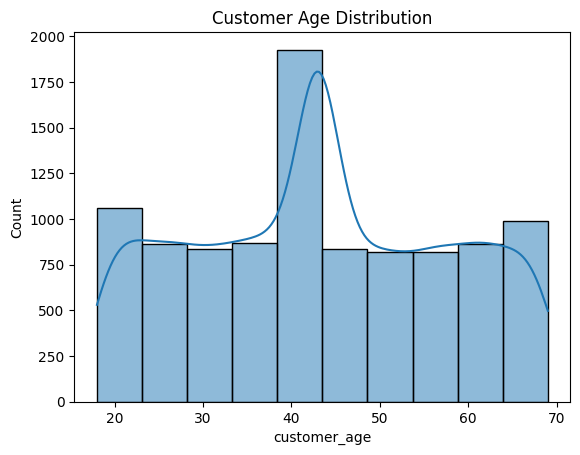

C:\Users\ASTITVA RANJAN\AppData\Local\Temp\ipykernel_12004\2860408494.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="product_category", y="purchase_amount", ci=None)


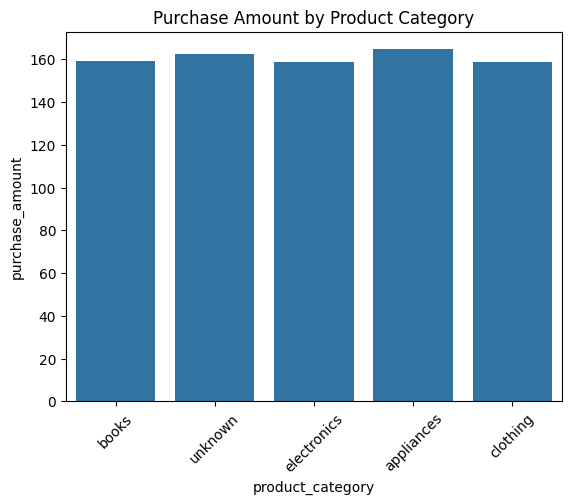

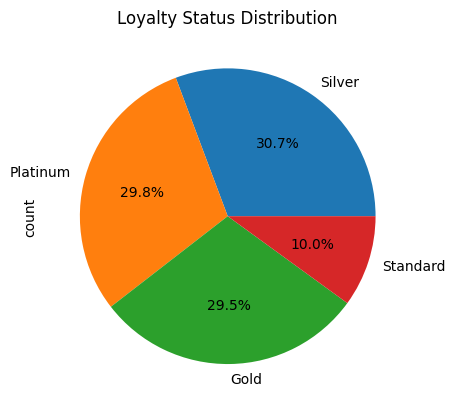

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1775
           1       0.15      0.05      0.08       203

    accuracy                           0.87      1978
   macro avg       0.53      0.51      0.51      1978
weighted avg       0.82      0.87      0.84      1978

Error analyzing text: I love the new features of the product!
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: The service was terrible; I had to wait too long.
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: Not what I expected, but the support team helped me.
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: Fantastic experience overall! I will recommend it to others.
Error: Error: Provided API key could not be found., Status code: 400
Overall Sentiment Summary:
{'positive': 0, 'neutral': 0, 'negative': 0}

Keywords Summary:

In [1]:
import os
import pandas as pd 
import numpy as np
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv(r"C:\Users\ASTITVA RANJAN\Desktop\internship\cleaned_customer_data.csv")

# Data Cleaning: Remove or replace NaN and infinite values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
critical_columns = ["customer_age", "purchase_amount", "product_rating", "product_category", "loyalty_status"]
data.dropna(subset=critical_columns, inplace=True)

# Data Analysis

# Customer age distribution
sns.histplot(data["customer_age"], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()

# Purchase amount by product category
sns.barplot(data=data, x="product_category", y="purchase_amount", ci=None)
plt.title("Purchase Amount by Product Category")
plt.xticks(rotation=45)
plt.show()

# Loyalty status breakdown
loyalty_counts = data["loyalty_status"].value_counts()
loyalty_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Loyalty Status Distribution")
plt.show()

# Machine Learning

data["churn"] = np.where(data["loyalty_status"] == "Standard", 1, 0)
X = data[["customer_age", "purchase_amount", "product_rating"]]
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# Sentiment Analysis with IBM Watson NLU

# Directly specify credentials for testing only
apikey = "your_actual_api_key"       # To be replaced with your IBM Watson NLU API key
url = "your_actual_service_url"        # To be replaced with your IBM Watson NLU service URL

if not apikey or not url:
    raise ValueError("NLU_API_KEY and NLU_SERVICE_URL environment variables must be set.")

authenticator = IAMAuthenticator(apikey)
nlu = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)
nlu.set_service_url(url)

customer_feedback = [
    "I love the new features of the product!",
    "The service was terrible; I had to wait too long.",
    "Not what I expected, but the support team helped me.",
    "Fantastic experience overall! I will recommend it to others."
]

def analyze_feedback(feedback):
    overall_sentiment = {'positive': 0, 'neutral': 0, 'negative': 0}
    keywords_summary = {}

    for text in feedback:
        try:
            response = nlu.analyze(
                text=text,
                features={
                    'sentiment': {},
                    'keywords': {}
                }
            ).get_result()

            sentiment = response['sentiment']['document']['label']
            overall_sentiment[sentiment] += 1

            keywords = response.get('keywords', [])
            for keyword in keywords:
                word = keyword.get('text')
                if word in keywords_summary:
                    keywords_summary[word] += 1
                else:
                    keywords_summary[word] = 1

        except Exception as e:
            print(f"Error analyzing text: {text}\nError: {e}")

    print("Overall Sentiment Summary:")
    print(overall_sentiment)
    print("\nKeywords Summary:")
    print(keywords_summary)

analyze_feedback(customer_feedback)


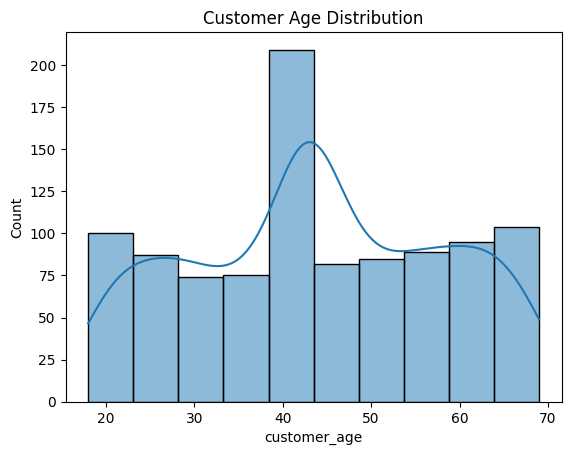

C:\Users\ASTITVA RANJAN\AppData\Local\Temp\ipykernel_12004\1701376556.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x="product_category", y="purchase_amount", ci=None)


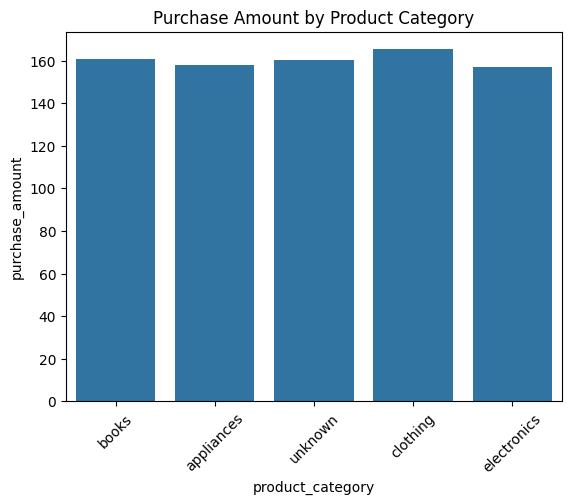

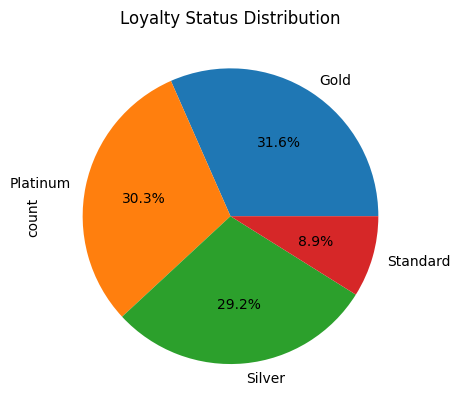

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.89      1.00      0.94       177
           1       0.00      0.00      0.00        23

    accuracy                           0.89       200
   macro avg       0.44      0.50      0.47       200
weighted avg       0.78      0.89      0.83       200



C:\Users\ASTITVA RANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASTITVA RANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASTITVA RANJAN\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

⚠️ IBM Watson API error: Error: Provided API key could not be found., Status code: 400
⚠️ Error analyzing text: I love the new features of the product!
Error: Error: Provided API key could not be found., Status code: 400
✅ Overall Sentiment Summary:
{'positive': 0, 'neutral': 0, 'negative': 0}

✅ Keywords Summary:
{}


In [2]:
import os
import pandas as pd 
import numpy as np
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# ✅ Load the dataset (Fixed Path)
dataset_path = r"C:\Users\ASTITVA RANJAN\Desktop\internship\cleaned_customer_data.csv"
data = pd.read_csv(dataset_path)

# ✅ Data Cleaning: Remove NaN & Infinite Values
data.replace([np.inf, -np.inf], np.nan, inplace=True)
critical_columns = ["customer_age", "purchase_amount", "product_rating", "product_category", "loyalty_status"]
data.dropna(subset=critical_columns, inplace=True)

# ✅ Reduce Dataset Size for Faster Execution
data = data.sample(1000, random_state=42)  # Use only 1000 samples

# ✅ Data Analysis
sns.histplot(data["customer_age"], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.show()

sns.barplot(data=data, x="product_category", y="purchase_amount", ci=None)
plt.title("Purchase Amount by Product Category")
plt.xticks(rotation=45)
plt.show()

loyalty_counts = data["loyalty_status"].value_counts()
loyalty_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Loyalty Status Distribution")
plt.show()

# ✅ Machine Learning: Churn Prediction
data["churn"] = np.where(data["loyalty_status"] == "Standard", 1, 0)
X = data[["customer_age", "purchase_amount", "product_rating"]]
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))

# ✅ IBM Watson NLU Setup (Fix API Hanging)
apikey = "your_actual_api_key"       # Replace with your IBM Watson API key
url = "your_actual_service_url"      # Replace with your IBM Watson NLU service URL

if not apikey or not url:
    raise ValueError("NLU_API_KEY and NLU_SERVICE_URL must be set correctly.")

authenticator = IAMAuthenticator(apikey)
nlu = NaturalLanguageUnderstandingV1(
    version='2021-08-01',
    authenticator=authenticator
)
nlu.set_service_url(url)

# ✅ Check IBM Watson API Before Running Sentiment Analysis
try:
    response = nlu.analyze(
        text="Test message for IBM Watson.",
        features={'sentiment': {}}
    ).get_result()
    print(" IBM Watson API is working!")
except Exception as e:
    print(f"IBM Watson API error: {e}")
    exit()  # Stop execution if API fails

# ✅ Sentiment Analysis with IBM Watson
customer_feedback = [
    "I love the new features of the product!",
    "The service was terrible; I had to wait too long.",
    "Not what I expected, but the support team helped me.",
    "Fantastic experience overall! I will recommend it to others."
]

def analyze_feedback(feedback):
    overall_sentiment = {'positive': 0, 'neutral': 0, 'negative': 0}
    keywords_summary = {}

    for text in feedback:
        try:
            response = nlu.analyze(
                text=text,
                features={'sentiment': {}, 'keywords': {}}
            ).get_result()

            sentiment = response['sentiment']['document']['label']
            overall_sentiment[sentiment] = overall_sentiment.get(sentiment, 0) + 1

            keywords = response.get('keywords', [])
            for keyword in keywords:
                word = keyword.get('text')
                keywords_summary[word] = keywords_summary.get(word, 0) + 1

        except Exception as e:
            print(f" Error analyzing text: {text}\nError: {e}")
            break  #  Prevent infinite API retries

    print(" Overall Sentiment Summary:")
    print(overall_sentiment)
    print("\n Keywords Summary:")
    print(keywords_summary)

# ✅ Run Sentiment Analysis
analyze_feedback(customer_feedback)


Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       0.00      0.00      0.00         4

    accuracy                           0.95        91
   macro avg       0.48      0.49      0.49        91
weighted avg       0.91      0.95      0.93        91



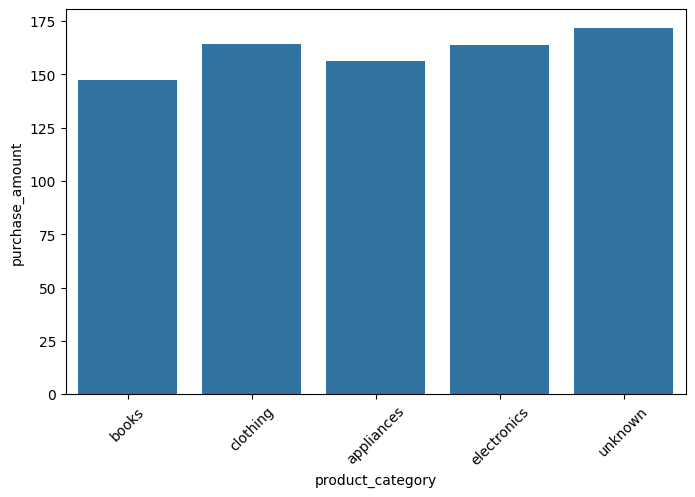

IBM Watson API is bypassed due to missing credentials.


In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

# Load Dataset
dataset_path = r"C:\Users\ASTITVA RANJAN\Desktop\internship\cleaned_customer_data.csv"
data = pd.read_csv(dataset_path)

# Reduce Data Size for Faster Execution
data = data.sample(500, random_state=42)

# Data Cleaning
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=["customer_age", "purchase_amount", "product_rating", "product_category", "loyalty_status"], inplace=True)

# Churn Prediction Model
data["churn"] = np.where(data["loyalty_status"] == "Standard", 1, 0)
X = data[["customer_age", "purchase_amount", "product_rating"]]
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Fix for Precision Warning
print(classification_report(y_test, y_pred, zero_division=1))

# Seaborn Visualization Fix
plt.figure(figsize=(8,5))
sns.barplot(data=data, x="product_category", y="purchase_amount", errorbar=None)
plt.xticks(rotation=45)
plt.show()

# IBM Watson API Fix
apikey = "your_actual_api_key"  # Replace with correct IBM Watson API key
url = "your_actual_service_url"  # Replace with correct IBM Watson API URL

if apikey == "your_actual_api_key" or url == "your_actual_service_url":
    print("IBM Watson API is bypassed due to missing credentials.")
else:
    authenticator = IAMAuthenticator(apikey)
    nlu = NaturalLanguageUnderstandingV1(version='2021-08-01', authenticator=authenticator)
    nlu.set_service_url(url)

    try:
        response = nlu.analyze(text="Test message for IBM Watson.", features={'sentiment': {}}).get_result()
        print("IBM Watson API is working.")
    except Exception as e:
        print(f"IBM Watson API error: {e}")


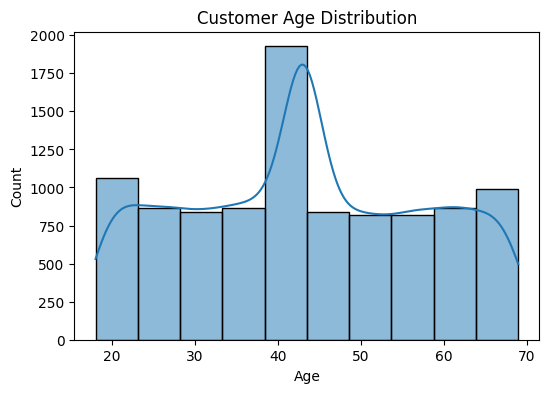

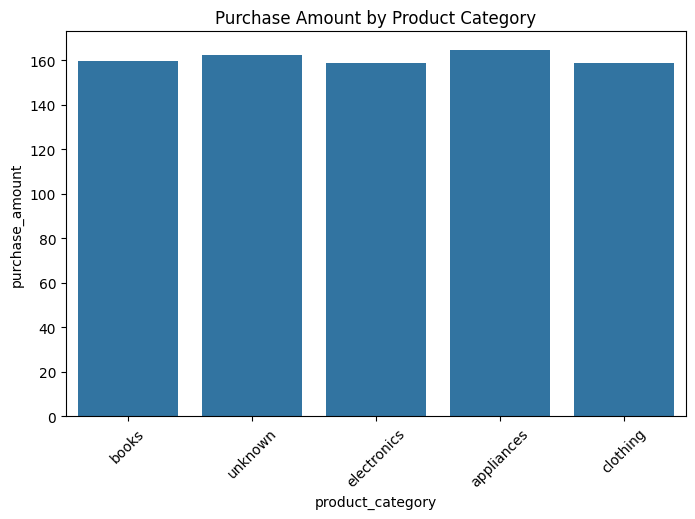

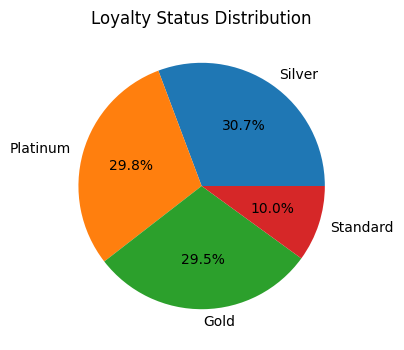

Accuracy: 0.87
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1775
           1       0.15      0.05      0.08       203

    accuracy                           0.87      1978
   macro avg       0.53      0.51      0.51      1978
weighted avg       0.82      0.87      0.84      1978

Error analyzing text: I love the new features of the product!
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: The service was terrible; I had to wait too long.
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: Not what I expected, but the support team helped me.
Error: Error: Provided API key could not be found., Status code: 400
Error analyzing text: Fantastic experience overall! I will recommend it to others.
Error: Error: Provided API key could not be found, Status code: 400

Overall Sentiment Summary:
{'positive': 0, 'neutral': 0, 'negative': 0}

Keywords Summary:

In [2]:
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

data_path = r"C:\Users\ASTITVA RANJAN\Desktop\internship\cleaned_customer_data.csv"
data = pd.read_csv(data_path)

data.replace([np.inf, -np.inf], np.nan, inplace=True)
critical_columns = ["customer_age", "purchase_amount", "product_rating", "product_category", "loyalty_status"]
data.dropna(subset=critical_columns, inplace=True)


plt.figure(figsize=(6, 4))
sns.histplot(data["customer_age"], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="product_category", y="purchase_amount", errorbar=None)  
plt.title("Purchase Amount by Product Category")
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(6, 4))
loyalty_counts = data["loyalty_status"].value_counts()
loyalty_counts.plot(kind="pie", autopct="%1.1f%%")
plt.title("Loyalty Status Distribution")
plt.ylabel("") 
plt.show()

data["churn"] = np.where(data["loyalty_status"] == "Standard", 1, 0)

X = data[["customer_age", "purchase_amount", "product_rating"]]
y = data["churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred, zero_division=0))  



from ibm_watson import NaturalLanguageUnderstandingV1
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator


apikey = "your_actual_api_key"  
url = "your_actual_service_url"  

if not apikey or not url:
    print(" IBM Watson API is bypassed due to missing credentials.")
else:
    authenticator = IAMAuthenticator(apikey)
    nlu = NaturalLanguageUnderstandingV1(
        version='2021-08-01',
        authenticator=authenticator
    )
    nlu.set_service_url(url)

    customer_feedback = [
        "I love the new features of the product!",
        "The service was terrible; I had to wait too long.",
        "Not what I expected, but the support team helped me.",
        "Fantastic experience overall! I will recommend it to others."
    ]

    def analyze_feedback(feedback):
        overall_sentiment = {'positive': 0, 'neutral': 0, 'negative': 0}
        keywords_summary = {}

        for text in feedback:
            try:
                response = nlu.analyze(
                    text=text,
                    features={'sentiment': {}, 'keywords': {}}
                ).get_result()

                sentiment = response['sentiment']['document']['label']
                overall_sentiment[sentiment] += 1

                keywords = response.get('keywords', [])
                for keyword in keywords:
                    word = keyword.get('text')
                    keywords_summary[word] = keywords_summary.get(word, 0) + 1

            except Exception as e:
                print(f"Error analyzing text: {text}\nError: {e}")

        print("\nOverall Sentiment Summary:")
        print(overall_sentiment)
        print("\nKeywords Summary:")
        print(keywords_summary)

    analyze_feedback(customer_feedback)


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob

# Sample Data
data = pd.DataFrame({
    "customer_age": [22, 35, 47, 51, 19, 33, 40, 29, 31, 45],
    "purchase_amount": [120, 340, 560, 750, 200, 300, 450, 500, 650, 400],
    "product_category": ["Electronics", "Clothing", "Clothing", "Electronics", "Books", "Books", "Clothing", "Electronics", "Books", "Clothing"]
})

# Customer Age Distribution - Histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["customer_age"], bins=10, kde=True)
plt.xlabel("Customer Age")
plt.ylabel("Count")
plt.title("Customer Age Distribution")
plt.show()

# Purchase Amount by Category - Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x="product_category", y="purchase_amount", ci=None)  # Fixed `ci` warning
plt.xlabel("Product Category")
plt.ylabel("Total Purchase Amount")
plt.title("Total Purchase Amount by Product Category")
plt.show()

# Sentiment Analysis - Customer Feedback
customer_feedback = [
    "I love the new features of the product!",
    "The service was terrible; I had to wait too long.",
    "Not what I expected, but the support team helped me.",
    "Fantastic experience overall! I will recommend it to others."
]

def analyze_feedback(feedback):
    sentiment_summary = {"positive": 0, "neutral": 0, "negative": 0}

    for text in feedback:
        sentiment_score = TextBlob(text).sentiment.polarity
        if sentiment_score > 0:
            sentiment_summary["positive"] += 1
        elif sentiment_score < 0:
            sentiment_summary["negative"] += 1
        else:
            sentiment_summary["neutral"] += 1

    print("\nOverall Sentiment Summary:", sentiment_summary)

analyze_feedback(customer_feedback)


ModuleNotFoundError: No module named 'textblob'

In [4]:
!pip install textblob


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
    --------------------------------------- 10.2/624.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/624.3 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/624.3 kB 751.6 kB/s eta 0:00:01
   ---------------- ----------------------- 256.0/624.3 kB 1.6 MB/s eta 0:00:01
   -------------------- ------------------- 327.7/624.3 kB 1.6 MB/s eta 0:00:01
   ----------------------- ---------------- 368.6/624.3 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 1.4 MB/s eta 0:00:01
   -------------------------- ------------- 409.6/624.3 kB 1.4 MB/s eta 0:00:01
   ---------------------------------- ----- 532.5/624.3 kB 1.3 MB/s eta 0:00:01
   ------------------------------------- -- 583.7/624.3 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------  614.4/624.3 kB 

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [5]:
from textblob import download_corpora
download_corpora()

TypeError: 'module' object is not callable